In [1]:
import finesse

def print_RTL():
    print(f"R = {ifo.M.R}\nT = {ifo.M.T}\nL = {ifo.M.L}")

In [2]:
ifo = finesse.Model()
ifo.parse("""
l L0 P=1
s s0 L0.p1 M.p1

m M
""")

print_RTL()

R = 0.5
T = 0.5
L = 0.0


In [3]:
ifo.M.R = 0.8

print_RTL()

finesse.element          :WARNING : Direct setting of M.R is not recommended. You should use M.set_RTL to set this parameter.
R = 0.8
T = 0.5
L = 0.0


In [4]:
ifo.M.L = 3e-5

print_RTL()

finesse.element          :WARNING : Direct setting of M.L is not recommended. You should use M.set_RTL to set this parameter.
R = 0.8
T = 0.5
L = 3e-05


In [5]:
try:
    ifo.M.set_RTL(0.5, 0.5, 0.5)
except ValueError as e:
    print(e)

Expected R + T + L = 1 in M.set_RTL but got R + T + L = 1.5


In [6]:
try:
    ifo.M.set_RTL(0.9)
except ValueError as e:
    print(e)

Invalid combination passed to M.set_RTL. One of the
following must be specified:

    - R and T or,
    - R and L or,
    - T and L or,
    - R and T and L


In [7]:
try:
    ifo.M.set_RTL(R=2, T=-1)
except ValueError as e:
    print(e)

Reflectivity must satisfy 0 <= R <= 1


In [8]:
try:
    ifo.M.set_RTL(R=0.8, T=0.4)
except ValueError as e:
    print(e)

Loss must satisfy 0 <= L <= 1


In [13]:
try:
    ifo.M.set_RTL(R=0.9, T=0.1, L=1e-5)
except ValueError as e:
    print(e)

Expected R + T + L = 1 in M.set_RTL but got R + T + L = 1.00005


In [9]:
print_RTL()

R = 0.8
T = 0.5
L = 3e-05


In [10]:
ifo.M.set_RTL(R=0.99, L=1e-5)

print_RTL()

R = 0.99
T = 0.009990000000000054
L = 1e-05


In [11]:
#ifo.M.T = 1 - (ifo.M.L.ref + ifo.M.R.ref)
#print(ifo.M.T)

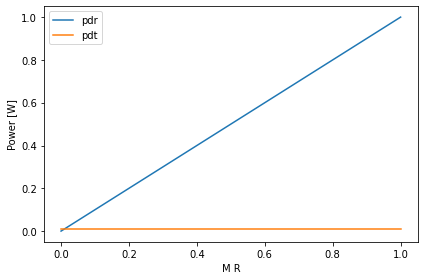

({finesse.detectors.powerdetector.PowerDetector: <Figure size 432x288 with 1 Axes>,
  'pdr': <Figure size 432x288 with 1 Axes>,
  'pdt': <Figure size 432x288 with 1 Axes>},
 {})

In [12]:
ifo.parse("""
pd pdr M.p1.o
pd pdt M.p2.o

xaxis M.R lin 0 1 10
""")
out = ifo.run()
out.plot()